In [1]:
import sys
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score # Thêm hàm tính điểm R2

# Thêm đường dẫn src
sys.path.append(os.path.abspath('../src'))

# Import để pickle hiểu được object đã lưu
from model import MLP
from layers import Dense
from activations import ReLU, Linear
from losses import MSE

# Cấu hình hiển thị
%matplotlib inline
print("Đã setup xong môi trường đánh giá!")

Đã setup xong môi trường đánh giá!


In [2]:
processed_dir = os.path.join('..', 'data', 'processed')

try:
    X_test = np.load(os.path.join(processed_dir, 'X_test.npy'))
    y_test = np.load(os.path.join(processed_dir, 'y_test.npy'))
    print(f"Đã load Test Set: {X_test.shape} mẫu.")
except FileNotFoundError:
    print("Không tìm thấy file dữ liệu.")

Đã load Test Set: (4087, 13) mẫu.


In [3]:
model_path = os.path.join('..', 'models', 'mlp_model.pkl')

if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    print("Đã load Model thành công!")
else:
    print("Không tìm thấy file model.")

Đã load Model thành công!


In [4]:
# 1. Dự đoán
print("Đang dự đoán trên tập Test...")
y_pred = model.predict(X_test)

# 2. Tính các chỉ số đánh giá (Metrics)
# MSE (Mean Squared Error)
mse = np.mean((y_test - y_pred)**2)

# RMSE (Root Mean Squared Error) - Sai số thực tế cùng đơn vị với Target
rmse = np.sqrt(mse)

# R2 Score (Độ phù hợp của mô hình: càng gần 1 càng tốt)
r2 = r2_score(y_test, y_pred)

print("\n=== KẾT QUẢ ĐÁNH GIÁ ===")
print(f"MSE (Sai số bình phương): {mse:.4f}")
print(f"RMSE (Sai số trung bình): {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

# QUAN TRỌNG: Quy đổi về tiền thật
# Vì lúc trước ta chia cho 100,000, giờ ta nhân lại để biết sai bao nhiêu đô la.
real_error_usd = rmse * 100000
print(f"\Sai số trung bình bằng tiền thật: ${real_error_usd:,.2f}")

Đang dự đoán trên tập Test...

=== KẾT QUẢ ĐÁNH GIÁ ===
MSE (Sai số bình phương): 0.3224
RMSE (Sai số trung bình): 0.5678
R2 Score: 0.7643
\Sai số trung bình bằng tiền thật: $56,779.20


<>:23: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
<>:23: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
/tmp/ipykernel_865916/1491074826.py:23: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
  print(f"\Sai số trung bình bằng tiền thật: ${real_error_usd:,.2f}")


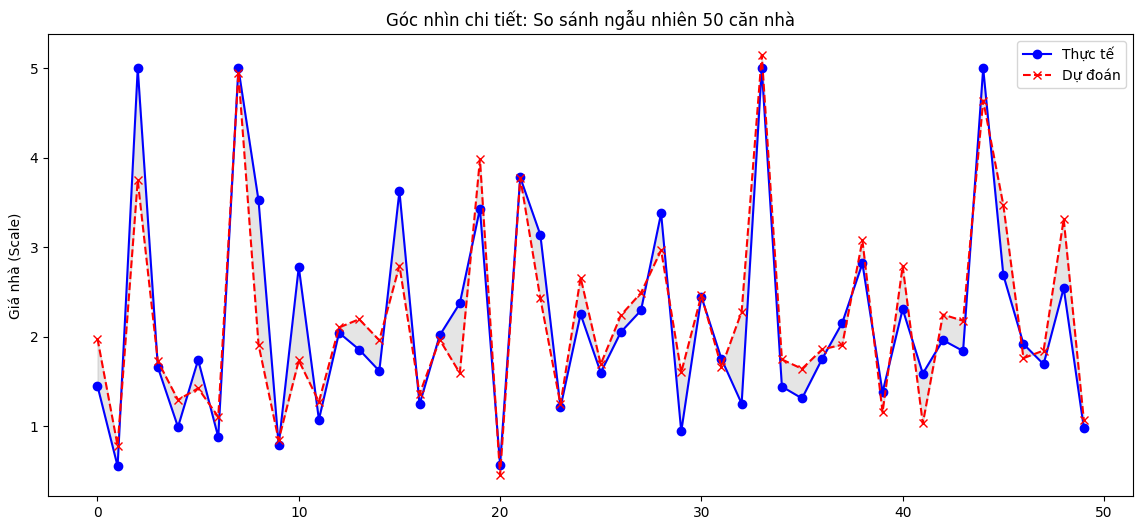

In [10]:
# Chọn ngẫu nhiên 50 mẫu từ tập Test để soi chi tiết
import numpy as np

# Tạo index ngẫu nhiên
num_samples = 50
random_indices = np.random.choice(len(y_test), num_samples, replace=False)

# Lấy dữ liệu theo index đó
y_test_sample = y_test[random_indices]
y_pred_sample = y_pred[random_indices]

plt.figure(figsize=(14, 6))
# Vẽ biểu đồ
plt.plot(range(num_samples), y_test_sample, label='Thực tế', marker='o', color='blue', linestyle='-')
plt.plot(range(num_samples), y_pred_sample, label='Dự đoán', marker='x', color='red', linestyle='--')

# Tô màu vùng sai lệch để dễ nhìn
plt.fill_between(range(num_samples), y_test_sample.flatten(), y_pred_sample.flatten(), color='gray', alpha=0.2)

plt.title(f"Góc nhìn chi tiết: So sánh ngẫu nhiên {num_samples} căn nhà")
plt.ylabel("Giá nhà (Scale)")
plt.legend()
plt.show()

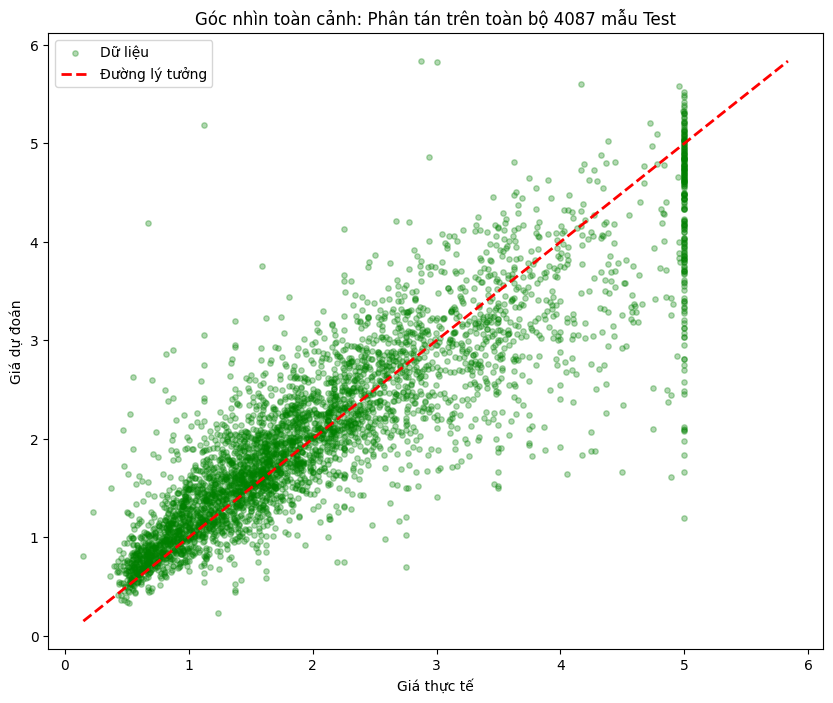

In [11]:
# Vẽ Scatter plot trên TOÀN BỘ tập Test
plt.figure(figsize=(10, 8))

# Dùng s=10 (size nhỏ) và alpha=0.3 (độ mờ) để nhìn thấy mật độ tập trung
plt.scatter(y_test, y_pred, alpha=0.3, color='green', s=15, label='Dữ liệu')

# Đường lý tưởng
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Đường lý tưởng')

plt.title(f"Góc nhìn toàn cảnh: Phân tán trên toàn bộ {len(y_test)} mẫu Test")
plt.xlabel("Giá thực tế")
plt.ylabel("Giá dự đoán")
plt.legend()
plt.show()

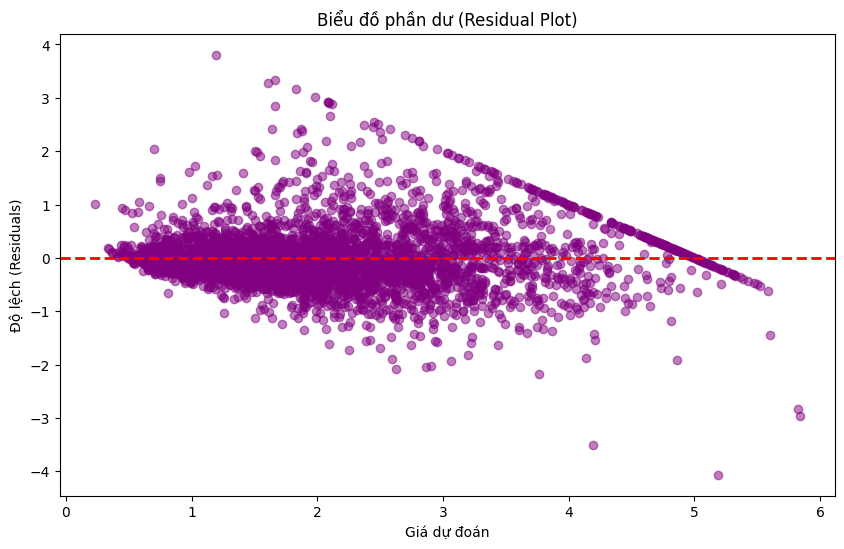

In [7]:
# Residual = Thực tế - Dự đoán
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='purple')

# Đường 0 (Không có lỗi)
plt.axhline(0, color='red', linestyle='--', linewidth=2)

plt.title("Biểu đồ phần dư (Residual Plot)")
plt.xlabel("Giá dự đoán")
plt.ylabel("Độ lệch (Residuals)")
plt.show()